<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Tarea4/Estimators_CrossValidationError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea y Contexto**

- Demostrar a través de Simulación Monte Carlo, la calidad de dos estimadores estadísticos.
- Generar un señal sinusoidal con ruido gaussiano, hacer ajuste polinomial y estimar la calidad del ajuste con MSE y CrossValidation Error
- Implementar un modelo MAP para la Regresión asociada al California Housing Dataset

#**Tarea 1**

Queremos estimar una señal constante de amplitud $A=5$ observada con **Ruido Gaussiano**. Cada observación está dada por:

$$x_i = A + w_i, \qquad w_i \sim \mathcal{N}(0,1)$$


Comparamos dos **estimadores** de $A$:
- **Estimador 1 ($\hat{A}_1$):** La media muestral de todas las $N$ observaciones.
- **Estimador 2 ($\hat{A}_2$):** El valor de la primer muestra.


Se implementa una **Simulación Monte Carlo ($M=10{,}000$ trials y $N=1{,}000$ muestras)** para estudiar la calidad de estos estimadores a través de su **varianza**.

En teoría, se deberían esperar los siguientes comportamientos para cada estimador:

- **Estimador 1 ($\hat{A}_1$):**

$$\hat A_1 = \frac{1}{N}\sum_{i=1}^N x_i
= A + \frac{1}{N}\sum_{i=1}^N w_i$$

$$\mathbb{E}[\hat A_1] = A + \frac{1}{N}\sum_{i=1}^N \mathbb{E}[w_i]
= A + \frac{1}{N}\dot{}0
= A$$

$$\operatorname{Var}[\hat A_1] = \operatorname{Var}\\Big[\frac{1}{N}\sum_{i=1}^N w_i\Big]
=\frac{1}{N^2}\sum_{i=1}^N \operatorname{Var}[w_i]
=\frac{1}{N^2}\sum_{i=1}^N 1
=\frac{1}{N}.
\$$

$$\
\boxed{\\hat A_1 \sim \mathcal{N}\\left(A,\frac{1}{N}\right)\}
\$$


- **Estimador 2 ($\hat{A}_2$):**

$$\
\hat A_2 = x_1
= A + w_1
\$$

$$\
\mathbb{E}[\hat A_2] = A + \mathbb{E}[w_1]
= A + 0
= A$$

$$\qquad
\operatorname{Var}[\hat A_2] = \operatorname{Var}[w_1] = 1
\$$

$$\
\boxed{\\hat A_2 \sim \mathcal{N}\\left(A,1\right)\}
\$$


In [315]:
# Library Import
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
M = 10000     # Monte Carlo Simulation Number
N = 1000      # Sample Size
A = 5         # Mean Expectated Amplitude

# Estimators History
A1 = np.zeros((M,1))
A2 = np.zeros((M,1))

# Simulation Loop
for m in range(M):
  # Simulation Progress Information
  if (m % 500 == 0 and m >= M/2) or (m == M-1):
    print(f'Monte Carlo Simulation {m}/{M}')
    print(f"Var[A1] = {np.var(A1)}, Var[A2] = {np.var(A2)}\n")

  w = np.random.randn(N) # New Noise Observation Set
  x = A + w              # Observation Sample Set

  A1[m] = np.mean(x) # Est1: Gaussian Likelihood Mean - i.i.d Data
  A2[m] = x[0]       # Est2: First Sample Element Value


Monte Carlo Simulation 5000/10000
Var[A1] = 6.250577032415395, Var[A2] = 6.7522498596474385

Monte Carlo Simulation 5500/10000
Var[A1] = 6.188256739297246, Var[A2] = 6.742617513180466

Monte Carlo Simulation 6000/10000
Var[A1] = 6.000739408456045, Var[A2] = 6.614221962455011

Monte Carlo Simulation 6500/10000
Var[A1] = 5.68847210901811, Var[A2] = 6.350079445305905

Monte Carlo Simulation 7000/10000
Var[A1] = 5.251223198582052, Var[A2] = 5.964905097006347

Monte Carlo Simulation 7500/10000
Var[A1] = 4.6883464610430075, Var[A2] = 5.454163764953354

Monte Carlo Simulation 8000/10000
Var[A1] = 4.000943474586357, Var[A2] = 4.8087358204938315

Monte Carlo Simulation 8500/10000
Var[A1] = 3.188274006062927, Var[A2] = 4.038169182936772

Monte Carlo Simulation 9000/10000
Var[A1] = 2.2508172711274463, Var[A2] = 3.1523863303921766

Monte Carlo Simulation 9500/10000
Var[A1] = 1.188417896391959, Var[A2] = 2.136191265937909

Monte Carlo Simulation 9999/10000
Var[A1] = 0.0034890090011045886, Var[A2] =

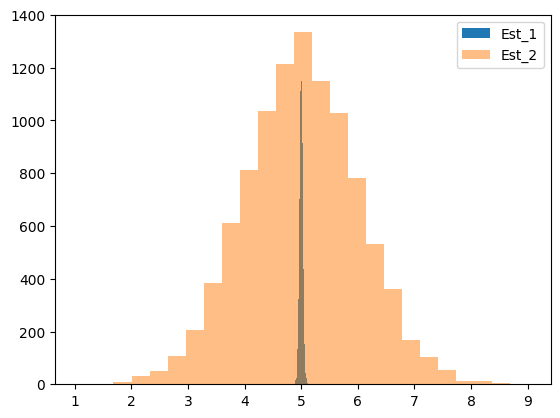

In [316]:
# Estimator Values Histogram
plt.hist(A1,bins=25, label='Est_1', alpha=1)
plt.hist(A2,bins=25, label='Est_2', alpha=0.5)
plt.legend()
plt.show()

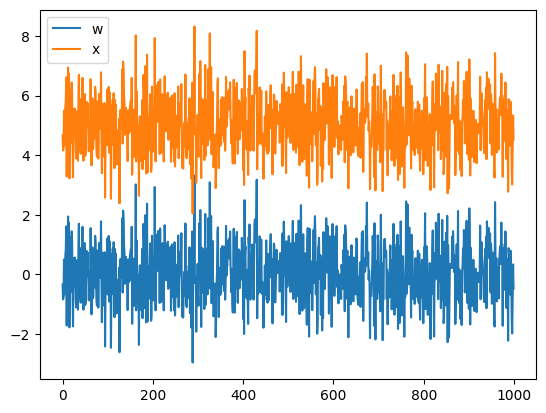

In [317]:
# Estimators Value Plot
plt.plot(w,label='w')
plt.plot(x,label='x')
plt.legend()
plt.show()

In [318]:
# Standard Statistical Estimators
mw = np.mean(w)
mx = np.mean(x)

vw = np.var(w)
vx = np.var(x)

print(f"Noise Mean: {mw}, Signal Mean: {mx}")
print(f"Noise Variance: {vw}, Signal Variance: {vx}")

Noise Mean: 0.05550502113924642, Signal Mean: 5.055505021139246
Noise Variance: 0.9515407146657882, Signal Variance: 0.9515407146657883


In [319]:
# Standard Statistical Estimators for each Selected Estimator
m1 = np.mean(A1)
m2 = np.mean(A2)

v1 = np.var(A1)
v2 = np.var(A2)
print(f"Est1 Mean: {m1}, Est2 Mean: {m2}")
print(f"Est1 Variance: {v1}, Est2 Variance: {v2}")

Est1 Mean: 4.999991762868307, Est2 Mean: 4.998351932820397
Est1 Variance: 0.00098958099172407, Est2 Variance: 0.997270329931056


**NOTA**

Este último resultado muestra cómo efectivamente el comportamiento de ambos estimadores $(\hat A_1, \hat A_2)$ ha sido bien determinado de acuerdo a la teoría. Donde:

$$\
\boxed{\\hat A_1 \sim \mathcal{N}\\left(A,\frac{1}{N}\right)\}
\$$

$$\
\boxed{\\hat A_2 \sim \mathcal{N}\\left(A,{1}\right)\}
\$$


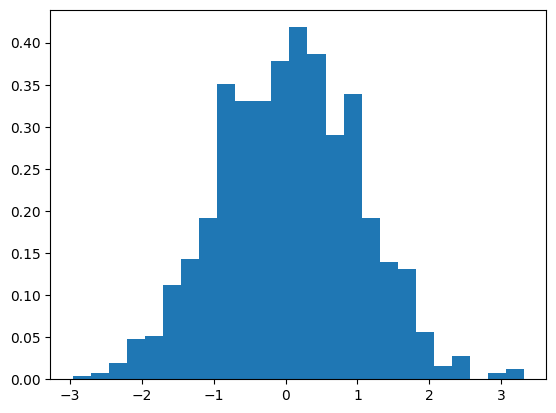

In [320]:
# Noise Gaussian Density Distribution
plt.hist(w, bins=25, density=True)
plt.show()

#**Tarea 2**
- Genere datos sintéticos a partir de un tono sinusoidal, contaminado con ruido blanco Gaussiano para $SNR_{dB}=\{1,2,5,10\} [dB].$

 - Entrene y pruebe los modelos de regresión por mínimos cuadrados (regularizado con norma L2) y log-verosimilitud, utilizando el $80\%$ de los datos para entrenar y el $20\%$ para evaluar.

### **Relación Señal-Ruido ó Signal to Noise Ratio (SNR)**

Sean las potencias para la señal y el ruido aplicado:

$$P_x = \frac{1}{T}\int |x(t)|^2 dt$$

$$P_\eta = \frac{1}{T}\int |\eta(t)|^2 dt$$

donde $P_x:$ Potencia de la Señal y $P_\eta:$ Potencia de la Señal


La SNR se define como:

$$SNR = \frac{P_x}{P_\eta}$$

En decibeles:

$$SNR_{dB}  = 10\log_{10}\left(\frac{P_x}{P_\eta}\right) \quad [dB]$$

Para pasar de $SNR_{dB}$ a SNR:

$$SNR = 10^{\frac{SNR_{dB}}{10}} =  \frac{P_x}{P_\eta}$$


Para el caso de ruido blanco Gaussiano:

$$\eta \sim p(\eta) = \mathscr{G}(\eta|0,\sigma_\eta^2)$$

Dado que $\mu_\eta = 0$:

$$\sigma_\eta^2 = \mathbb{E}\{(\eta-\mu_\eta)^2\} = \mathbb{E}\{\eta^2\} $$

Utilizando estimador de media muestral:

$$\sigma_{\eta}^{2}=\frac{1}{N}\sum_\limits{\eta} \eta^2$$

Entonces:

$$\sigma_{\eta}^{2} = P_\eta = \frac{P_x}{SNR} =  \frac{P_x}{ 10^{\frac{SNR_{dB}}{10}}}$$


In [321]:
import numpy as np
import matplotlib.pyplot as plt

# Variance Calculation Function from SNR dB
def varSNR(x, snrdB):
  '''
  x: Signal Vector
  snrdB: Signal to Noise Ratio in dB
  '''

  # Mean Power Estimator from Signal
  Px = np.mean(x**2)
  return Px/(10**(snrdB/10))

Se construyen los datos a partir del modelo:

$$t_n = A*sinc(2\pi F_o x_n) + \eta_n$$

con:

$sinc(\theta) = \sin(\theta)/\theta$

$x_n \in [0,T_o]$

$T_o=1/F_o$

$\eta \sim \mathscr{G}(\eta_n|0,\sigma^2_\eta)$

In [322]:
# Simulated Data
Fo = 60           # Fundamental Frecuency
A = 10            # Signal Amplitude
To = 1/Fo         # Fundamental Period
Fs = 250*Fo       # Sampling Frecuency according to Nyquist Criteria
X = np.arange(-1.5*To, 1.5*To, 1/Fs) # Input Vector over 3 Centered Periods with 1/T Steps

snrdB = np.array([1,2,5,10]) # Noise Power Vector
arg = 2*np.pi*Fo*X # Argument for Sinusoidal Signal
tt = A*np.sin(arg) / arg  # Clean Objective Signal

# Signal Contaminated with Gaussian White Noise
#t = tt + np.sqrt(varSNR(tt, snrdB[-1])) * np.random.randn(len(X))
tArr = np.array([(tt + np.sqrt(varSNR(tt, snrdB[i])) * np.random.randn(len(X)))
                  for i in range(len(snrdB))])

X = X.reshape(-1,1)
for t in tArr:
  t = t.reshape(-1,1)

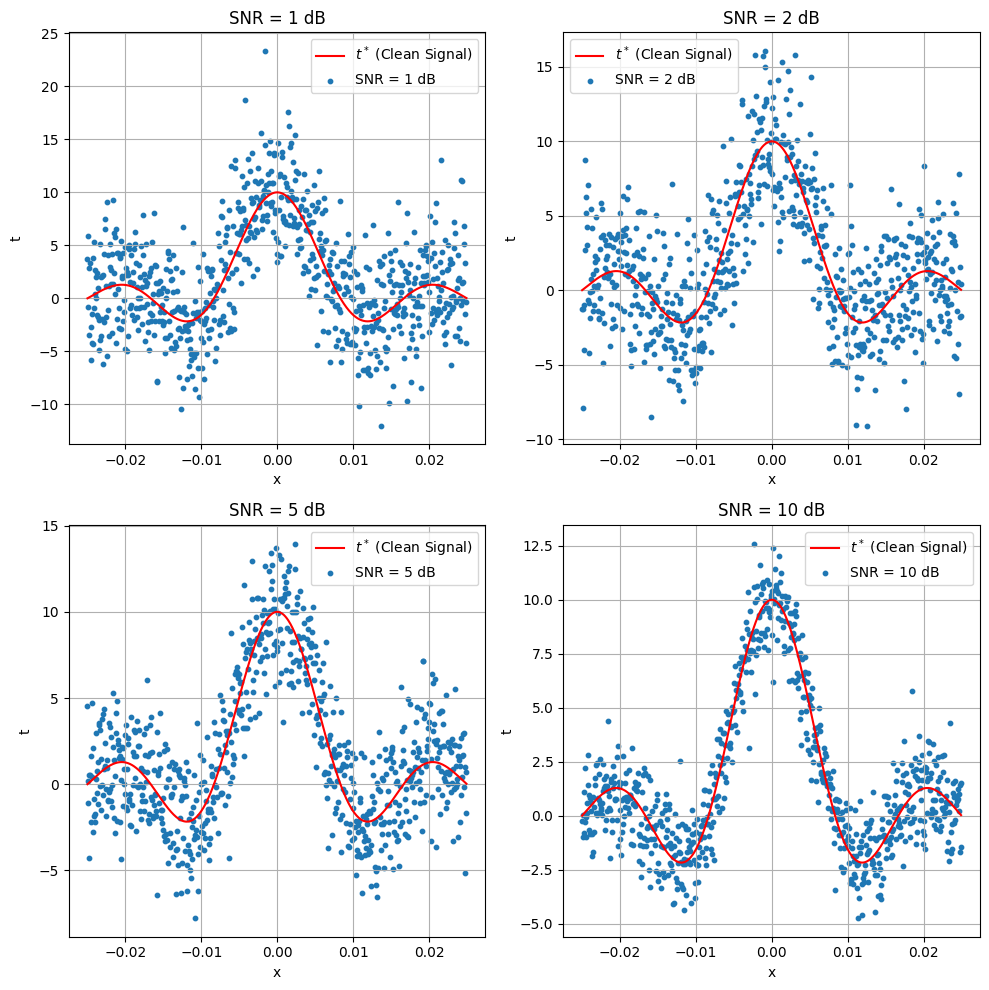

In [323]:
# Signals Visualization with Different Powers
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, t in enumerate(tArr):
    axes[i].plot(X, tt, c='r', label='$t^*$ (Clean Signal)')
    axes[i].scatter(X, t, label=f'SNR = {snrdB[i]} dB', s=10)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('t')
    axes[i].set_title(f'SNR = {snrdB[i]} dB')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

##**Solución por mínimos cuadrados:**

Se asume mapeo $\phi:\mathbb{R}^P\to\mathbb{R}^Q$, con $Q\geq P.$

Dado el conjunto de datos $\{\phi(\mathbf{x}_n) \in \mathbb{R}^Q, t_n \in \mathbb{R}\}_{n=1}^N,$ podemos definir el modelo lineal:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\mathbf{w}\in\mathbb{R}^Q$

## Estimador por mínimos cuadrados:

El estimador generalizado de mínimos cuadrados con regularización L2 (Ridge Linear Regression), se puede plantear como:

$$\mathbf{w}_{MC2} = \arg\min_{\mathbf{w}} \|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2 + \lambda \|\mathbf{w}\|^2_2$$

con:

$\mathbf{t} = [t_1,t_2,\cdots,t_n]^\top\in\mathbb{R}^N$

$\pmb{\Phi}=[\phi(\mathbf{x}_1),\phi(\mathbf{x}_2),\cdots,\phi(\mathbf{x}_N)]^\top\in\mathbb{R}^{N\times Q}$

$\lambda\in\mathbb{R}^{+}$

Derivando e igualando a cero para encotrar el mínimo de la función de costo, tenemos que:

$$\mathbf{w}_{mc} = \left(\pmb{\Phi}^\top \pmb{\Phi}+\lambda\mathbf{I_Q}\right)^{-1}\pmb{\Phi}^\top \mathbf{t}$$

$\mathbf{I}_Q$: matriz identidad de tamaño $Q$.





##**Error Cuadrático Medio (MSE) y Error por Validación Cruzada**

En tareas de regresión, medimos la calidad de las predicciones por medio del **Error Cuadrático Medio (MSE)**:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N \big( y_i - \hat{y}_i \big)^2
$$

donde $y_i$ es el valor verdadero, $\hat{y}_i$ la predicción del modelo, and $N$ el número de muestras de prueba.  

Un MSe pequeño indica una mejor capacidad predictiva (Mayor Precisión).

---

Para asegurarnos de que nuestro modelo generaliza bien y no solo ajusta nuestros datos de entrenamiento, usamos **Validación Cruzada (CV)**.  
En la **Validación Cruzada por K-capas**, el conjunto de datos se divide en $K$ partes (capas). Por cada capa:

1. Entrenamos en $K-1$ capas.  
2. Probamos en la capa restante.  
3. Computamos el MSE para dicha capa.

Finalmente, el **Error por Validación Cruzada (CV Error)** se obtiene promediando a través de las capas:

$$
\text{CV Error} = \frac{1}{K} \sum_{k=1}^{K} \text{MSE}_k
$$

---

En el contexto de la tarea de regresión de una **Señal Sinusoidal Contaminada por Ruido Gaussiano Blanco**, el error CV provee un estimado robusto de la función subyacente mientras restringe hasta cierto el efecto del ruido circundante.


In [324]:
# Library Import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [325]:
trainedModels = []     # Model Storage
predictions = []        # Predictions of Models Stored
MSE = []                # MSE of Models Stored
CVErrors = []          # Cross-Validation MSE Error of Models Stored

# Regression Coefficients of Models Stored
coefficientsFull = []
coefficientsKFold = []

# X Transformed Storage Arrays
PhiArr = []
XTrainArr = []
XTestArr = []
yTrainArr = []
yTestArr = []
degrees = [i for i in range(1, 16)]

for i in degrees:
  phiQ = PolynomialFeatures(degree=i)
  Phi = phiQ.fit_transform(X)
  PhiArr.append(Phi)

  # Full Training Set Fitting and Predictions
  XTrainFull, XTestFull, yTrainFull, yTestFull = train_test_split(Phi, tArr[-1], test_size=0.2, random_state=0)
  XTrainArr.append(XTrainFull)
  XTestArr.append(XTestFull)
  yTrainArr.append(yTrainFull)
  yTestArr.append(yTestFull)

  regFull = Ridge(alpha=1e-28)
  regFull.fit(XTrainFull, yTrainFull)
  yPredFull = regFull.predict(XTestFull)
  trainedModels.append(regFull)
  predictions.append(yPredFull)
  MSE.append(mean_squared_error(yTestFull, yPredFull))
  coefficientsFull.append(regFull.coef_)

  # Cross-validation Setup
  kf = KFold(n_splits=5, shuffle=True, random_state=0)
  foldMSE = [] # List to store MSE for each fold
  coefficientsFold = [] # List to Store Coefficients Vector of the Regression

  for trainIndex, testIndex in kf.split(Phi):
    XTrain, XTest = Phi[trainIndex], Phi[testIndex]
    yTrain, yTest = tArr[-1][trainIndex], tArr[-1][testIndex]

    reg = Ridge(alpha=1e-28)
    reg.fit(XTrain, yTrain)
    yPred = reg.predict(XTest)
    foldMSE.append(mean_squared_error(yTest, yPred))
    coefficientsFold.append(reg.coef_)

  # Calculate average MSE for the current degree (Cross-Validation Error)
  coefficientsKFold.append(np.mean(coefficientsFold, axis=0))
  CVErrors.append(np.mean(foldMSE))

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.00208e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.00208e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.87699e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.90383e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.13061e-28): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/pytho

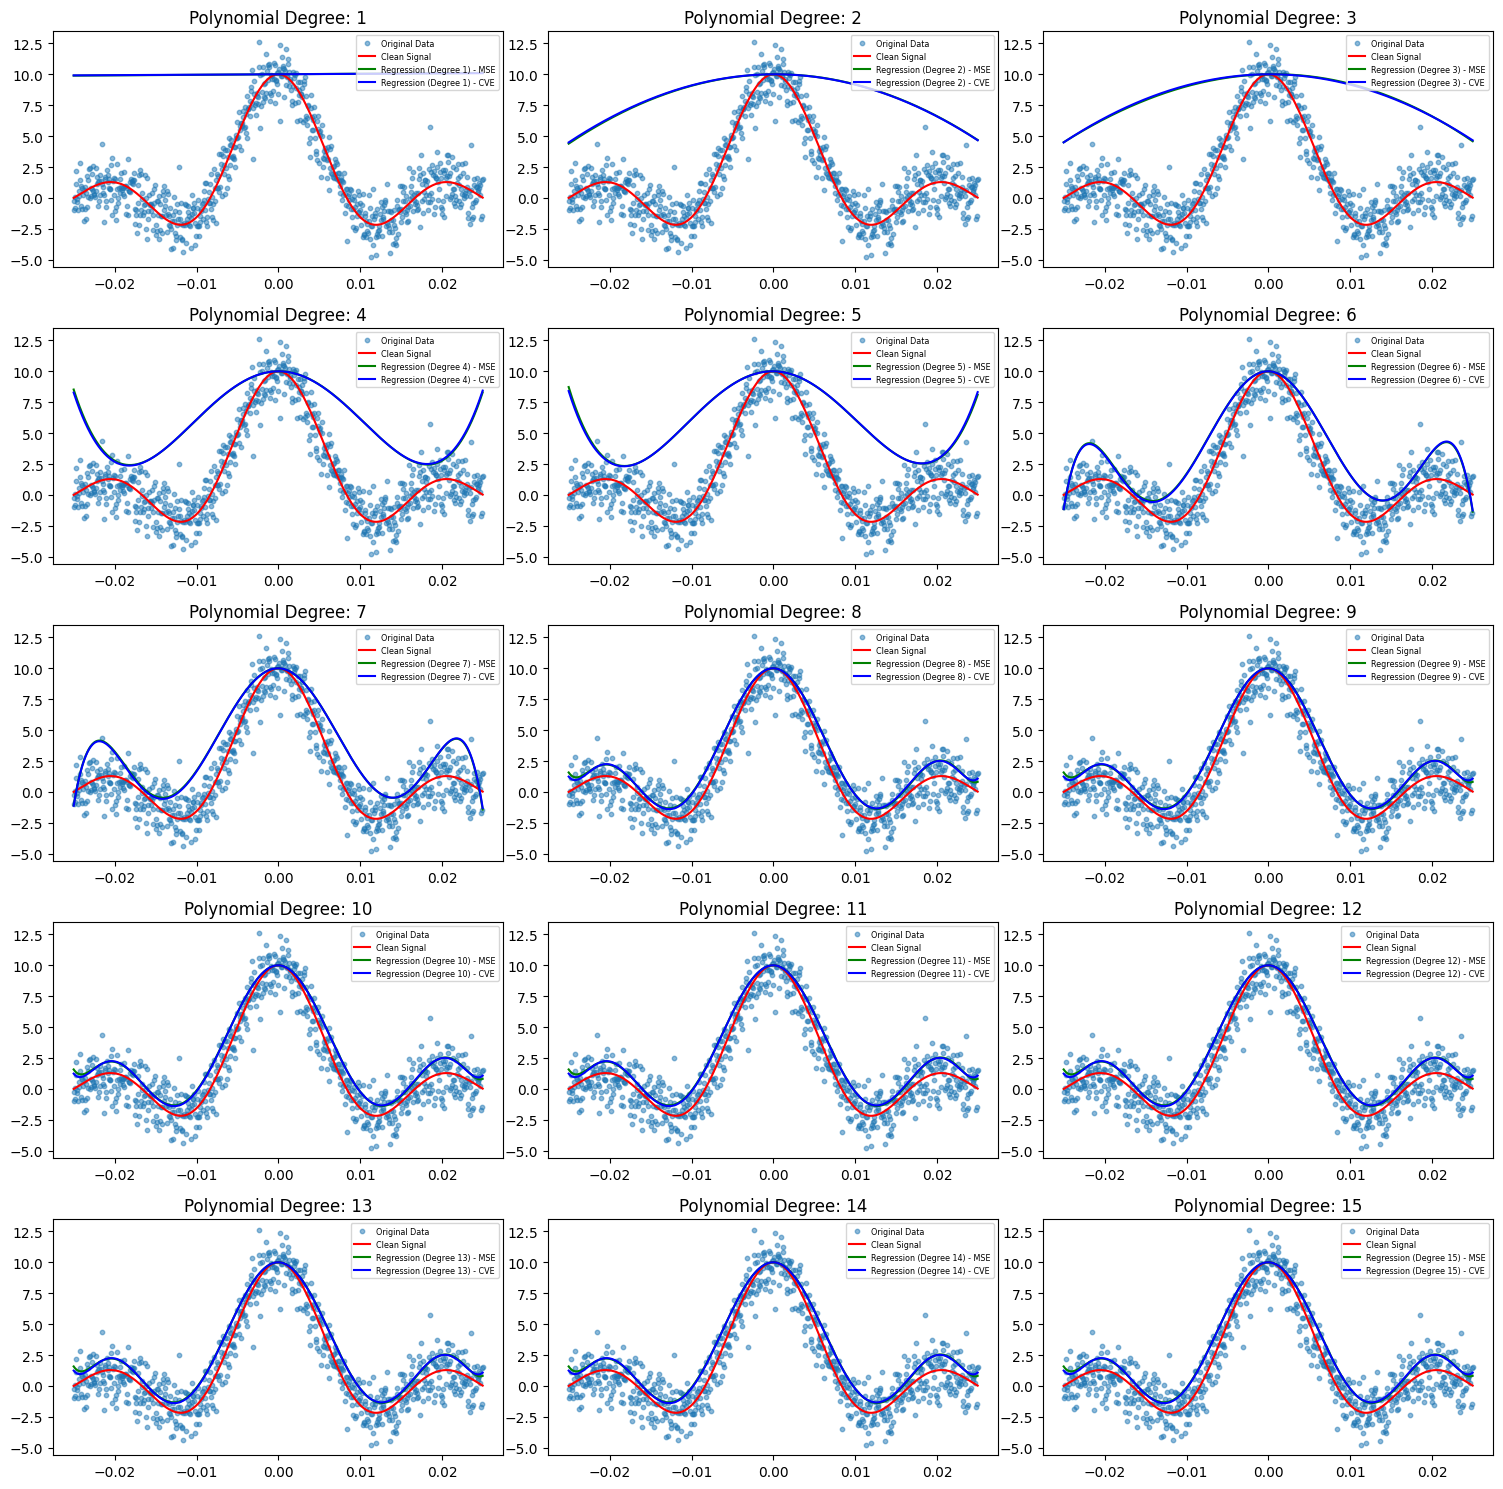

In [326]:
# Regressions Visualizations
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Calculate the regression line using the stored coefficients and the original X range
  yMSE = A + PhiArr[i] @ coefficientsFull[i].T
  yCV = A + PhiArr[i] @ coefficientsKFold[i].T

  # Plotting the regression line and the ML variance area
  ax.scatter(X.flatten(), tArr[-1].flatten(), label='Original Data', s=10, alpha=0.5)
  ax.plot(X.flatten(), tt.flatten(), c='r', label='Clean Signal')

  # Plot the regression line using the original X values
  ax.plot(X.flatten(), yMSE.flatten(), c='g', label=f'Regression (Degree {degree}) - MSE')
  ax.plot(X.flatten(), yCV.flatten(), c='b', label=f'Regression (Degree {degree}) - CVE')
  ax.set_title(f'Polynomial Degree: {degree}')
  ax.legend(loc='upper right', fontsize='xx-small')

plt.tight_layout()
plt.show()

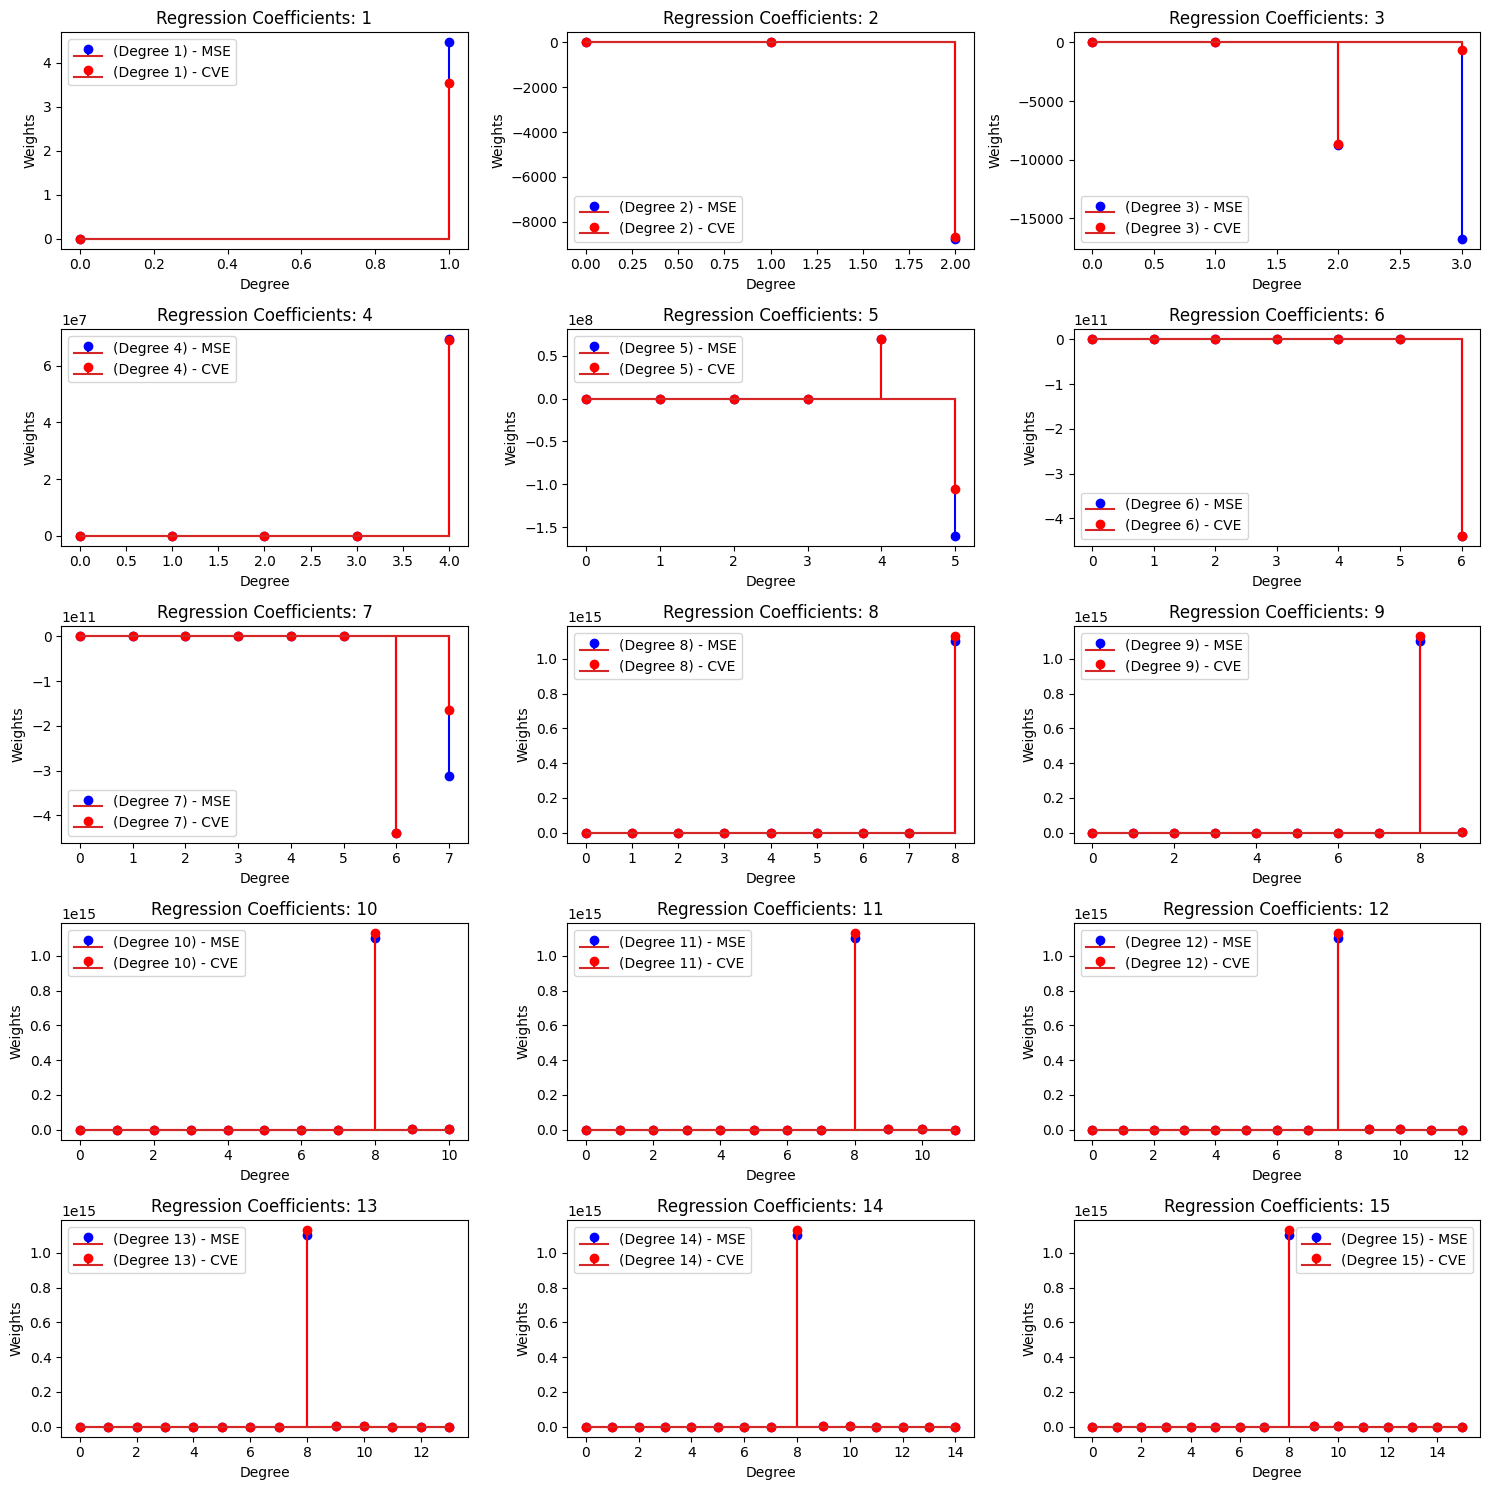

In [327]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Plot Regression Coefficients Values of ith Degree
  ax.stem(coefficientsFull[i], linefmt='b-', label=f'(Degree {degree}) - MSE')
  ax.stem(coefficientsKFold[i], linefmt='r-', label=f'(Degree {degree}) - CVE')
  ax.set_title(f'Regression Coefficients: {degree}')
  ax.set_ylabel('Weights')
  ax.set_xlabel('Degree')
  ax.legend()

plt.tight_layout()
plt.show()

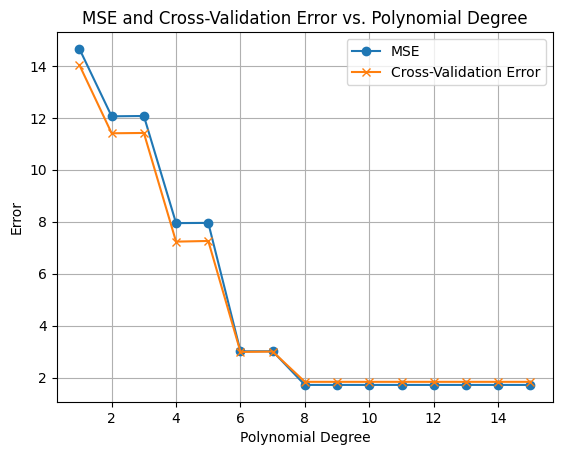

In [328]:
plt.plot(degrees, MSE, marker='o', label='MSE')
plt.plot(degrees, CVErrors, marker='x', label='Cross-Validation Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('MSE and Cross-Validation Error vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

**NOTA**

El mejor polinomio de ajuste es el Grado 8, dado que este es el Polinomio de menor complejidad que mejor minimiza el error cuadrático medio y el error por validación cruzada.

##**Predictiva desde máxima verosimilitud**

Para el caso de ruido blanco Gaussiano, tenemos que:

$\eta_n \sim p(\eta_n) = \mathscr{G}(\eta_n|0,\sigma_\eta^2)$

con:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\eta_n = t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top$

Por lo tanto:

$p(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2)$

Podemos encontrar los pesos y la varianza maximizando el log-verosimilitud:

$$\mathbf{w}_{ML} = \arg\max_{\mathbf{w},\sigma_\eta^2} \log\left(\prod_{n=1}^N\mathscr{G}(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2)\right)$$

Asumiendo datos i.i.d.:

$$\mathbf{w}_{ML},\sigma_{ML}^2 = \arg\max_{\mathbf{w},\sigma_\eta^2} -\frac{N}{2}\log(2\pi)-\frac{N}{2}\log(\sigma_\eta^2)-\frac{1}{2\sigma^2}\|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2$$

Derivando respecto a las variables de interés, e igualando a 0:

$$\sigma^2_{ML} = \frac{1}{N}\sum_\limits{n=1}^N\left(t_n-\phi(\mathbf{x}_n)\mathbf{w}^\top\right)^2$$

$$\mathbf{w}_{ML} = \left(\pmb{\Phi}^\top \pmb{\Phi}\right)^{-1}\pmb{\Phi}^\top \mathbf{t}$$


La fdp predictiva, para un nuevo dato $\mathbf{x}_*$, se puede estimar como:

$$p(t_*|\mathbf{x}_*,\mathbf{t},\pmb{\Phi},\mathbf{w}_{ML},\sigma^2_{ML})=\mathscr{G}(t_*|\phi(\mathbf{x}_*)\mathbf{w}_{ML}^\top,\sigma_{ML}^2)$$

Es posible observar que la Regresión por Máxima Verosimilitud degenera en una solución de Mínimos Cuadrados para variables de tipo i.i.d.

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3574298168.py:31: SyntaxWarning: invalid escape sequence '\s'
  color='g', alpha=0.2, label='ML Variance ($1.96\sigma_{ML}$)')


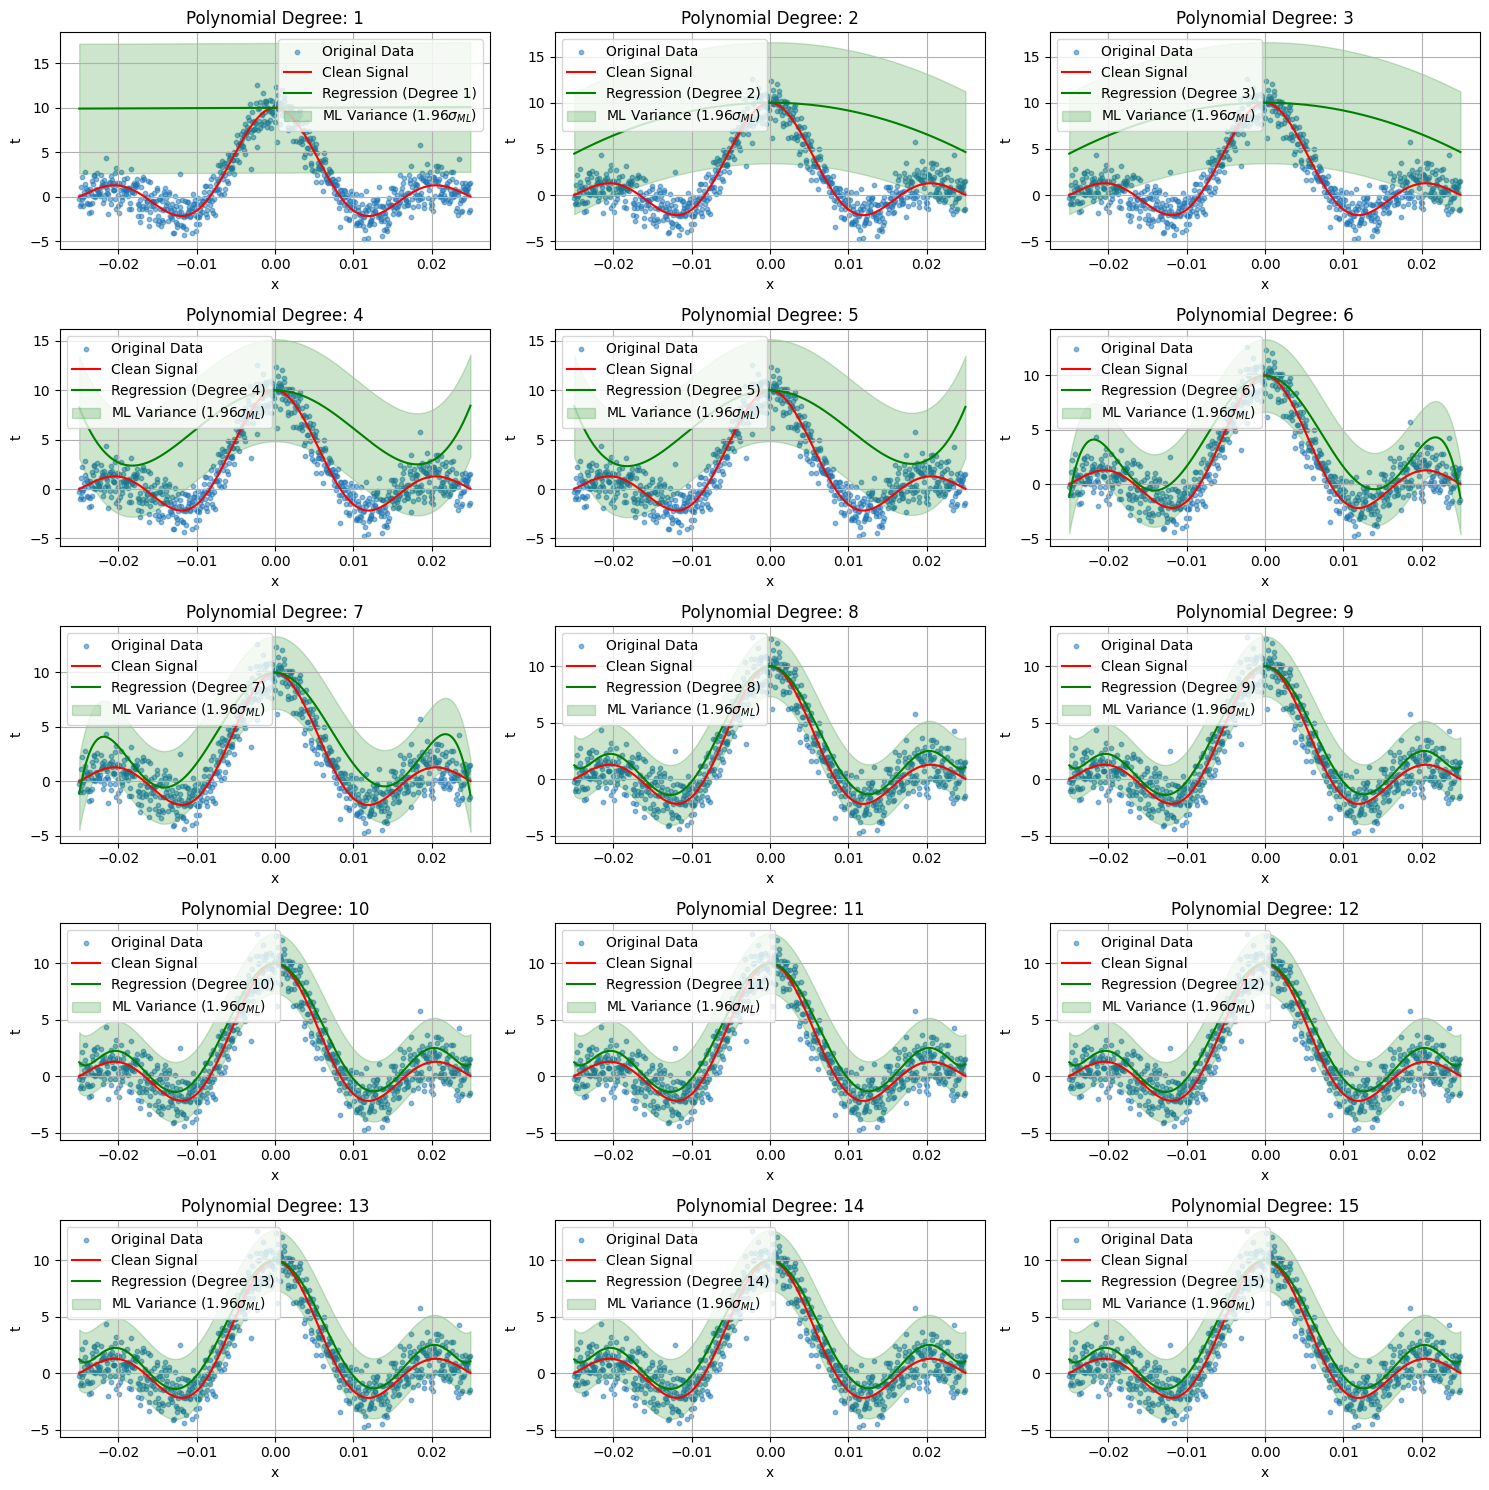

In [329]:
"""
This code snippet presents the Solutions to the solution problem,
adding a variance term to the least squares regression, which represents
the maximum likelihood solution.

In the graph, this variance will be represented as the shaded green area and
will present a 95% confidence interval given by 1.96*(VarML)
"""
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, degree in enumerate(degrees):
  ax = axes[i]

  # Calculate the regression line using the stored coefficients and the original X range
  y = A + PhiArr[i] @ coefficientsKFold[i].T

  # Calculate ML variance using the provided formula on the training data
  varML = (np.linalg.norm(yTrainArr[i] - trainedModels[i].predict(XTrainArr[i]))**2) / len(yTrainArr[i])

  # Plotting the regression line and the ML variance area
  ax.scatter(X.flatten(), tArr[-1].flatten(), label='Original Data', s=10, alpha=0.5)
  ax.plot(X.flatten(), tt.flatten(), c='r', label='Clean Signal')

  # Plot the regression line using the original X values
  ax.plot(X.flatten(), y.flatten(), c='g', label=f'Regression (Degree {degree})')

  ax.fill_between(X.flatten(),
                  y.flatten() - 1.96*np.sqrt(varML),
                  y.flatten() + 1.96*np.sqrt(varML),
                  color='g', alpha=0.2, label='ML Variance ($1.96\sigma_{ML}$)')


  ax.set_title(f'Polynomial Degree: {degree}')
  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.legend()
  ax.grid(True)

plt.tight_layout()
plt.show()

##**Teorema del límite central**

Sea $x_n \sim p(x_n)$ una variable aleatoria con fdp $p(x_n)$.

La combinación:

$a_0 x_0+a_1x_1+a_2x_2+ \cdots a_N x_N \sim \mathscr{G}(\sum_n a_n x_n | \mu_,\sigma^2)$

Siendo $
\mathscr{G}$ una fdp Gaussiana.

##**Ejemplo**

Sea $x\sim \mathscr{U}(x|0,1)$ una variable aleatoria con fdp Uniforme. Mediante una simulación de Monte-Carlo de 1000 repeticiones, encuentre la estimación por histograma de la fdp de la media muestral $x$, con base al muestreo desde la fdp Uniforme con $N\in\{1.2.10\}$ datos.

<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:19: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:19: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-1046335547.py:18: SyntaxWarning: invalid escape sequence '\h'
  ax.set_xlabel('$\hat{\mu}(x)$')
/tmp/ipython-input-1046335547.py:19: SyntaxWarning: invalid escape sequence '\h'
  ax.set_ylabel('$\hat{p}(\hat{\mu}(x))$')


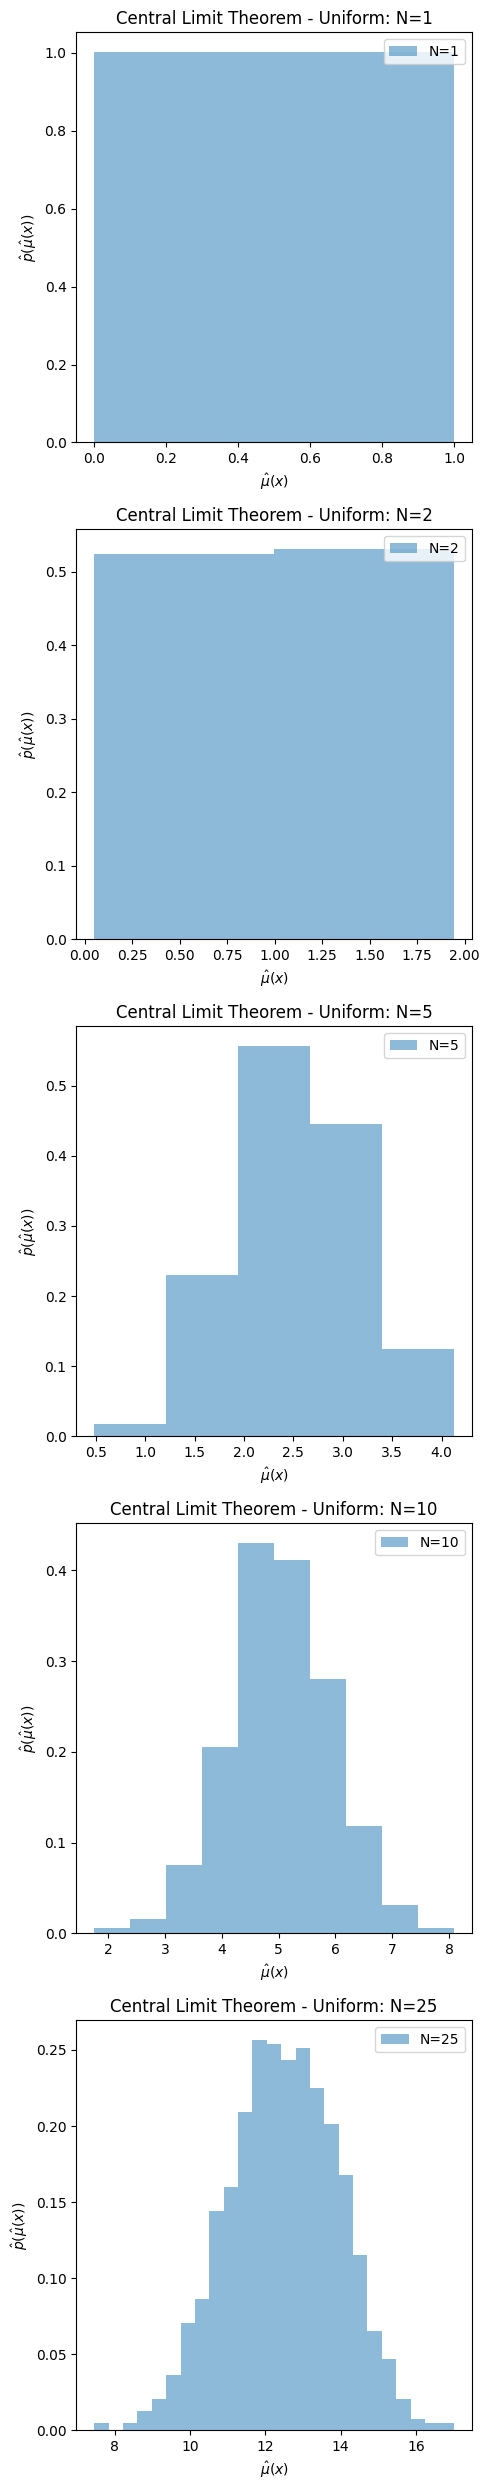

In [330]:
# Central Limit Theorem Simulation
import numpy as np
import matplotlib.pyplot as plt

N = np.array([1, 2, 5, 10, 25]) # Possible Data Array
M = 1000  # Number of Monte Carlo Simulations
mlc = np.zeros((M,len(N)))

fig, axes = plt.subplots(5, 1, figsize=(5, 25))
axes = axes.flatten()
for i in range(len(N)):
  ax = axes[i]

  for j in range(M):    # Monte Carlo Loop
    xdata = np.random.rand(N[i])    # Data Simulation given Uniform PDF
    mlc[j,i] = xdata.mean()         # Sample Mean Estimator
  ax.hist(mlc[:,i]*N[i], bins=N[i], label='N='+str(N[i]), density=True, alpha=0.5)
  ax.set_xlabel('$\hat{\mu}(x)$')
  ax.set_ylabel('$\hat{p}(\hat{\mu}(x))$')
  ax.set_title(f'Central Limit Theorem - Uniform: N={N[i]}')
  ax.legend()

plt.tight_layout()
plt.show()

##**Gaussianas condicionales y máximo a posteriori**

Para resolver el regresor Bayesiano completo, necesitamos encontrar la probabilidad condicional dado una probabilidad conjunta Gaussiana.

Para el caso del máximo a posteriori, desde el teorema de Bayes, tenemos que (se simplifica el modelo en función de la salida y los pesos para facilitar la notación):

$p(\mathbf{t},\mathbf{w})=p(\mathbf{w},\mathbf{t})$

$p(\mathbf{t}|\mathbf{w})p(\mathbf{w})=p(\mathbf{w}|\mathbf{t})p(\mathbf{t})$

El posterior $p(\mathbf{w}|\mathbf{t})$ se puede encontrar como:

$$p(\mathbf{w}|\mathbf{t})=\frac{p(\mathbf{t}|\mathbf{w})p(\mathbf{w})}{p(\mathbf{t})}$$

con evidencia:


$p(\mathbf{t})=\int p(\mathbf{t}|\mathbf{w})p(\mathbf{w}) d\mathbf{w}$

Para el caso de ruido y pesos modelados mediante fdp Gaussinas:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\eta_n \sim p(\eta_n)= \mathscr{G}(\eta_n|0,\sigma_\eta^2)$

$\eta_n = t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top$

Por lo tanto:

$p(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}\left(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2\right)$

Además:

$p(\mathbf{w})= \mathscr{G}(\mathbf{w}|0,\sigma_w^2\mathbf{I}_Q)$

El modelo por máximo a-posteriori, simplifica la relación de Bayes mediante la proporcionalidad:

$p(\mathbf{w}|\mathbf{t}) \propto p(\mathbf{t}|\mathbf{w})p(\mathbf{w})$

Por consiguiente, asumiendo datos i.i.d.:

$$\mathbf{w}_{MAP} = \arg\max_{\mathbf{w}} \log\left(\prod_{n=1}^N\mathscr{G}\left(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2\right)\prod_{q=1}^Q \mathscr{G}({w}_q|0,\sigma_w^2)\right)$$

Asumiendo datos i.i.d.:

$$\mathbf{w}_{MAP} = \arg\max_{\mathbf{w}} (-\frac{1}{2\sigma_\eta^2}\|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2 - \frac{1}{2\sigma_w^2}\|\mathbf{w}\|^2_2)$$

Teniendo en cuenta que los factores de escala no modifican el punto mínimo/máximo en la optmización, podemos factorizar el problema equivalente MAP como:


$$\mathbf{w}_{MAP} = \arg\min_{\mathbf{w}} (\|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2 + \frac{\sigma^2_\eta}{\sigma_w^2}\|\mathbf{w}\|^2_2)$$

Bajo estas suposiciones, el problema de optimización de MAP asumiendo ruido y prior Gaussianos, es equivalente a la optimización de mínimos cuadrados regularizados con $\lambda=\frac{\sigma^2_\eta}{\sigma_w^2}.$

Ahora, analizando un modelo lineal Gaussiano desde la conjunta:


$\mathbf{z} = [\mathbf{x}_a,\mathbf{x}_b] \sim \mathscr{G}(\mathbf{z}|\pmb{\mu},\mathbf{\Sigma})$

tenemos que:

$p(\mathbf{x}_a|\mathbf{x}_b)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a|b},\mathbf{\Sigma}_{a|b})$


donde:

$\pmb{\mu}_{a|b}=\pmb{\mu}_{a}+\mathbf{\Sigma}_{ab}\mathbf{\Sigma}_{bb}^{-1}(\mathbf{x}_b - \pmb{\mu}_b)$

$\mathbf{\Sigma}_{a|b} = \mathbf{\Sigma}_{aa}-\mathbf{\Sigma}_{ab}\mathbf{\Sigma}_{bb}^{-1}\mathbf{\Sigma}_{ba}$

y

$p(\mathbf{x}_a)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a},\mathbf{\Sigma}_{aa})$




##**Ejemplo:**

Sea la variable aleatoria $\mathbf{z} = [x_a,x_b]\sim \mathscr{G}(\mathbf{z}|\pmb{\mu},\mathbf{\Sigma})$, con:

$$\pmb{\mu} = [\mu_a,\mu_b] = [0.5,0.2]$$

$$\pmb{\Sigma}= \begin{bmatrix} \sigma_a^2 & \sigma_{ab}\\ \sigma_{ba} & \sigma^2_{b}\end{bmatrix} = \begin{bmatrix} 0.8 & 0.3\\ 0.3 & 0.6\end{bmatrix} $$


Encuentre y grafique $p(\mathbf{x}_a)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a},\mathbf{\Sigma}_{aa})$ y $p(\mathbf{x}_a|\mathbf{x}_b)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a|b},\mathbf{\Sigma}_{a|b})$

/tmp/ipython-input-1157148154.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


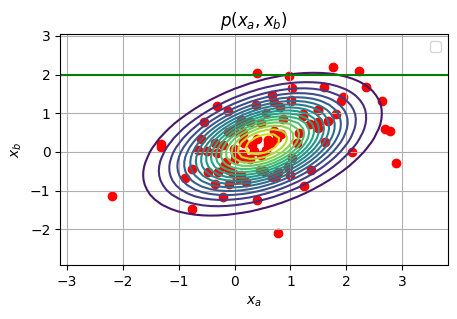

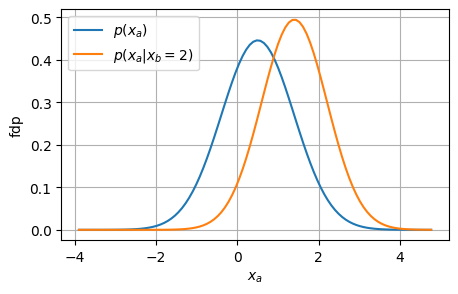

In [331]:
from scipy.stats import multivariate_normal as mn
# Simulating Joint PDF
N = 100
muC = np.array([0.5, 0.2])
SigmaC = np.array([[0.8,0.3], [0.3,0.6]])
pdfC = mn(muC, SigmaC)
Xd = pdfC.rvs(size=N)
pC = pdfC.pdf(Xd)

# MeshGrid Contour
h = 0.02
x_min, x_max = Xd[:, 0].min() - np.std(Xd[:, 0]), Xd[:, 0].max() + np.std(Xd[:, 0])
y_min, y_max = Xd[:, 1].min() - np.std(Xd[:, 1]), Xd[:, 1].max() + np.std(Xd[:, 1])
xx, yy = np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)

X = np.linspace(x_min, x_max, round(0.5*N))
Y = np.linspace(y_min, y_max, round(0.5*N))
X, Y = np.meshgrid(X, Y)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Evaluate Joint PDF
Z = pdfC.pdf(pos)

# Contours
plt.figure(figsize=(5,3))
plt.contour(X, Y, Z,levels=20)

# Scatter
xb = 2
plt.scatter(Xd[:,0],Xd[:,1],c='r')
plt.plot(np.linspace(x_min,x_max,50),xb*np.ones((50,1)),c='g')
plt.grid()
plt.xlabel('$x_a$')
plt.ylabel('$x_b$')
plt.title('$p(x_a,x_b)$')
plt.legend()
plt.show()

# Marginal Probability of P(x_a)
mu_a = 0.5
Sigma_a = 0.8
pdf_a = mn(mu_a, Sigma_a)
X_a = np.linspace(1.25*x_min,1.25*x_max,N)
p_a = pdf_a.pdf(X_a)

# Conditional Probability P(x_a | x_b=2)
mu_b = 0.2
Sigma_ab = 0.3
Sigma_ba = Sigma_ab
Sigma_b = 0.6

mu_alb = mu_a+Sigma_ab*Sigma_b**(-1)*(xb - mu_b)
Sigma_alb = Sigma_a-Sigma_ab*Sigma_b**(-1)*Sigma_ba
pdf_alb = mn(mu_alb, Sigma_alb)
p_alb = pdf_alb.pdf(X_a)


plt.figure(figsize=(5,3))
plt.plot(X_a,p_a,label='$p(x_a)$')
plt.plot(X_a,p_alb,label='$p(x_a|x_b=2)$')
plt.xlabel('$x_a$')
plt.ylabel('fdp')
plt.grid()
plt.legend()
plt.show()

##**Modelo lineal Gaussiano**

Sea el prior:

$p(\mathbf{x})=\mathscr{G}(\mathbf{x}|\pmb{\mu},\pmb{\Lambda}^{-1})$

Además, sea la verosimilitud desde un modelo lineal $\mathbf{y} = \mathbf{A}\mathbf{x}+\mathbf{b}$:

$p(\mathbf{y}|\mathbf{x})=\mathscr{G}(\mathbf{y}|\mathbf{A}\mathbf{x}+\mathbf{b},\mathbf{L}^{-1})$

Completando cuadrados sobre la Gaussiana conjunta, tenemos que:

$p(\mathbf{y})=\mathscr{G}(\mathbf{y}|\mathbf{A}\pmb{\mu}+\mathbf{b},\mathbf{L}^{-1}+\mathbf{A}\pmb{\Lambda}^{-1}\mathbf{A}^\top)$

$p(\mathbf{x}|\mathbf{y})=\mathscr{G}(\mathbf{y}|\pmb{\mu}_{x|y},\mathbf{\Sigma}_{x|y})$

con:

$\pmb{\mu}_{x|y} = \mathbf{\Sigma}_{x|y}\left(\mathbf{A}^\top\mathbf{L}(\mathbf{y}-\mathbf{b})+\pmb{\Lambda}\pmb{\mu}\right)$

$\mathbf{\Sigma}_{x|y} = \left(\pmb{\Lambda}+\mathbf{A}^\top\mathbf{L}\mathbf{A}\right)^{-1}$

Para el caso del modelo de regresión:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\eta_n \sim p(\eta_n)= \mathscr{G}(\eta_n|0,\sigma_\eta^2)$

$\eta_n = t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top$

Por lo tanto, la verosimilitud se puede escribir como:

$p(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}\left(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2\right)$

En forma vectorial:

$p(\mathbf{t}|\pmb{\Phi}\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}\left(\mathbf{t}|\pmb{\Phi}\mathbf{w}^\top,\sigma_\eta^2\right)$

Asumiendo el prior:

$p(\mathbf{w}) = \mathscr{G}(\mathbf{w}|\mathbf{m}_o,\mathbf{S}_o)$

El posterior se puede estimar como:

$p(\mathbf{w}|\mathbf{t}) = \mathscr{G}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)$

donde:

$\mathbf{m}_N = \mathbf{S}_N\left(\mathbf{S}_o^{-1}\mathbf{m}_o + \frac{1}{\sigma_\eta^2}\pmb{\Phi}^\top\mathbf{t}\right)$

$\mathbf{S}_N = \left(\mathbf{S}_o^{-1} + \frac{1}{\sigma_\eta^2}\pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}$

Si se impone un prior de la forma:

$p(\mathbf{w}) = \mathscr{G}(\mathbf{w}|0,\sigma_w^2)$

Entonces:

$p(\mathbf{w}|\mathbf{t}) = \mathscr{G}(\mathbf{w}|\tilde{\mathbf{m}}_N,\tilde{\mathbf{S}}_N)$


$\tilde{\mathbf{m}}_N = \frac{1}{\sigma_\eta^2} \tilde{\mathbf{S}}_N\pmb{\Phi}^\top\mathbf{t}$

$\tilde{\mathbf{S}}_N = \left(\frac{1}{\sigma_w^2}\mathbf{I}_Q + \frac{1}{\sigma_\eta^2}\pmb{\Phi}^\top\pmb{\Phi}\right)^{-1} = \left(\frac{1}{\sigma_\eta^2}\right)^{-1}\left(\frac{\sigma_\eta^2}{\sigma_w^2}\mathbf{I}_Q + \pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}$

Reemplazando en la media condicional:

$\tilde{\mathbf{m}}_N = \frac{1}{\sigma_\eta^2} \left(\frac{1}{\sigma_\eta^2}\right)^{-1}\left(\frac{\sigma_\eta^2}{\sigma_w^2}\mathbf{I}_Q + \pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}\pmb{\Phi}^\top\mathbf{t}$


$\tilde{\mathbf{m}}_N = \left(\frac{\sigma_\eta^2}{\sigma_w^2}\mathbf{I}_Q + \pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}\pmb{\Phi}^\top\mathbf{t}$

**Nota:** la solución del modelo lineal Gaussiano para el prior $p(\mathbf{w}) = \mathscr{G}(\mathbf{w}|0,\sigma_w^2)$ y ante ruido blanco Gaussiano $\eta_n \sim p(\eta_n)= \mathscr{G}(\eta_n|0,\sigma_\eta^2)$, es equivalente en la media $\tilde{\mathbf{m}}_N$ a la solución de mínimos cuadrados regularizados.


##**Predictiva**

Para un nuevo dato $\mathbf{x}_*$, la distribución predictiva referente a la salida $t_*$ se puede calcular como:

$p(t_*|\mathbf{x}_*,\mathbf{t},\mathbf{w}) = \int p(t_*|\mathbf{x}_*,\mathbf{w})p(\mathbf{w}|\mathbf{t})d\mathbf{w}$

$p(t_*|\mathbf{t}) = \int \mathscr{G}\left(t_*|\phi(\mathbf{x}_*)\mathbf{w}^\top,\sigma_\eta^2\right)\mathscr{G}(\mathbf{w}|\tilde{\mathbf{m}}_N,\tilde{\mathbf{S}}_N)d\mathbf{w}$

$p(t_*|\mathbf{x}_*,\mathbf{t},\mathbf{w}) = \mathscr{G}\left(t_*|\phi(\mathbf{x}_*)\tilde{\mathbf{m}}_N^\top,\sigma_\eta^2 + \phi(\mathbf{x}_*)\tilde{\mathbf{S}}_N \phi(\mathbf{x}_*)^\top\right)$



##**Ejercicio:**

Implementar simulación para el regresor lineal Gaussiano (Bayesiano), para la señal:

Se construyen los datos a partir del modelo:

$$t_n = A*sinc(2\pi F_o x_n) + \eta_n$$

con:

$sinc(\theta) = \sin(\theta)/\theta$

$x_n \in [0,T_o]$

$T_o=1/F_o$

$\eta \sim \mathscr{G}(\eta_n|0,\sigma^2_\eta)$

Imponga prior Gaussiano isotrópico con media cero.

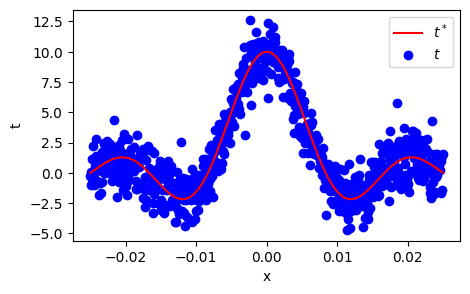

In [332]:
# Simulated Data
Fo = 60           # Fundamental Frecuency
A = 10            # Signal Amplitude
To = 1/Fo         # Fundamental Period
Fs = 250*Fo       # Sampling Frecuency according to Nyquist Criteria
X = np.arange(-1.5*To, 1.5*To, 1/Fs) # Input Vector over 3 Centered Periods with 1/T Steps

snrdB = np.array([1,2,5,10, 25]) # Noise Power Vector
arg = 2*np.pi*Fo*X # Argument for Sinusoidal Signal
tt = A*np.sin(arg) / arg  # Clean Objective Signal

# Signal Contaminated with Gaussian White Noise
t = tt + np.sqrt(varSNR(tt, snrdB[-1])) * np.random.randn(len(X))

X = X.reshape(-1,1)
for t in tArr:
  t = t.reshape(-1,1)

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t^*$')
plt.scatter(X,t,c='b',label='$t$')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [333]:
def trainLinGauss(X, t, phiQ, sig_eta, sig_w, tol=1e-30):
  """
  Function for Training a Linear Gaussian Regressor,
  given a Prior for MAP Estimation.
  """

  Phi = phiQ.fit_transform(X)
  lambdaR = sig_eta/sig_w
  SNinv = Phi.T @ Phi + lambdaR*np.eye(Phi.shape[1]) # Covariance
  val, vec = np.linalg.eigh(SNinv) # Eigenvalues and Eigenvector
  ind = val > tol # Searching for non-singular eigenvalues
  SN = vec[:,ind] @ (np.diag(1/val[ind])) @ (vec[:,ind].T)
  mN = SN @ Phi.T @ t   # Gaussian Mean Linear Estimation
  return mN,SN,val

def predictLinGauss(xnew,phiQ,mN,SN,sig_eta):
  """
  Function for Predicting a Linear Gaussian Regressor,
  given a Prior for MAP Estimation.
  """
  Phinew = phiQ.fit_transform(xnew) # Polinomial Mapping Nnew x Q
  mnew = Phinew @ mN
  signew = np.diag(sig_eta*np.eye(Phinew.shape[0]) + (Phinew @ SN @ Phinew.T))
  return mnew, signew

In [334]:
# Generating Polynomial Representation
from sklearn.model_selection import ShuffleSplit

Q = 8 # Polynomial Degree
phiQ = PolynomialFeatures(degree=Q)

# Data Partitioning
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2)
for i, (train_i, test_i) in enumerate(rs.split(X)):
   print(i)
train_i = np.sort(train_i)
test_i = np.sort(test_i)

# Gaussian Linear Regressor
sig_eta = 1
sig_w = 1e30
mN,SN,val = trainLinGauss(X[train_i], t[train_i], phiQ, sig_eta, sig_w)
mnew, signew = predictLinGauss(X[test_i], phiQ, mN, SN, sig_eta)

print(mnew.shape, signew.shape)

0
(150, 1) (150,)


<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1855293924.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.scatter(X,t,c='b',label='$t+\eta$')


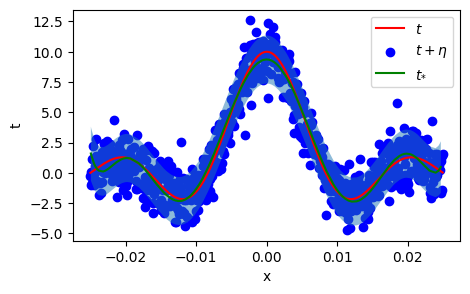

In [335]:
plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t$')
plt.scatter(X,t,c='b',label='$t+\eta$')
plt.plot(X[test_i],mnew,c='g',label='$t_{*}$')
plt.fill_between(X[test_i].ravel(), mnew.ravel() - 1.96*signew,
                        mnew.ravel() + 1.96*signew, alpha=0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# Visualización Regresor Bayesiano en Función de los Datos de Entrenamiento

Se plantea un modelo de regresión lineal con ruido y prior Gaussianos isotrópicos.

In [336]:
# Graphing 2D PDF
def PDF2D(mu, Sigma, axes, N=100, h=0.02, xlabel_='$w_0$', ylabel_='$w_1$',
             cmap = 'Reds',xlim=None,ylim=None):
  pdfx = mn(mu, Sigma)
  Xx = pdfx.rvs(size=N)
  pp = pdfx.pdf(Xx)

  # MeshGrid Contours
  if xlim == None:
    x_min, x_max = pdfx.mean[0] - 4*pdfx.cov[0,0], pdfx.mean[0] + 4*pdfx.cov[0,0]
  else:
    x_min, x_max = xlim[0], xlim[1]
  if ylim == None:
    y_min, y_max = pdfx.mean[1] - 4*pdfx.cov[1,1], pdfx.mean[1] + 4*pdfx.cov[1,1]
  else:
    y_min, y_max = ylim[0], ylim[1]
  xx, yy = np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)

  X = np.linspace(x_min, x_max, round(0.5*N))
  Y = np.linspace(y_min, y_max, round(0.5*N))
  X, Y = np.meshgrid(X, Y)

  # Pack X and Y into a single 3-dimensional array
  pos = np.empty(X.shape + (2,))
  pos[:, :, 0] = X
  pos[:, :, 1] = Y

  # Evaluate Joint PDF
  Z = pdfx.pdf(pos)

  # Contours
  axes.contourf(X, Y, Z,levels=20,cmap = cmap)
  axes.grid()
  axes.set_xlabel(xlabel_)
  axes.set_ylabel(ylabel_)
  axes.set_xlim(xlim)
  axes.set_xlim(ylim)

  plt.title('$p(x_a,x_b)$')
  return

def LinRegSyn(mu, Sigma, axes, xmin=-1, xmax=1, Nmod = 10, xlim=[-1.2,1.2], ylim=[-1.2,1.2]):
  pdfw = mn(mu, Sigma)
  wmod = pdfw.rvs(size=Nmod)
  X = np.random.uniform(low=xmin, high=xmax, size=100)
  t = wmod.dot(np.r_[X.reshape(1,-1),np.ones((1,X.shape[0]))])
  axes.plot(X,t.T,c='b')
  axes.set_xlabel('$x$')
  axes.set_ylabel('$f(x|w)$')
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  return

def posteriorUpdate(X, t, sig_eta, sig_w, tol=1e-20):
  """
  X: Size (N, P)
  sig_eta: Noise Variance
  sig_w: Prior Variance
  """
  lambdaR = sig_eta/sig_w
  SNinv =(X.T @ X) + lambdaR*np.eye(X.shape[1]) # Covariance
  val,vec = np.linalg.eigh(SNinv)
  ind = val > tol     # Eigenvalues Greater than Tolerance
  SN = vec[:,ind].dot(np.diag(1/val[ind])).dot(vec[:,ind].T)
  mN = np.squeeze(SN.dot(X.T.dot(t)))       # Gaussian Mean Linear Estimator
  return mN,SN # mN: Posterior Mean and SN: Posterior Covariance

def predictiveUpdate(xnew,mN,SN,sig_eta):
  mnew = xnew.dot(mN)
  signew = np.diag(sig_eta*np.eye(xnew.shape[0]) + xnew.dot(SN).dot(xnew.T))
  return mnew, signew

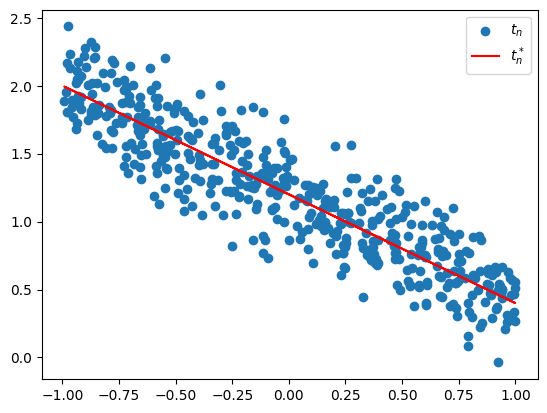

In [337]:
# Data Simulation: Linear Regression - Gaussian Noise
snrdB = 15 # Noise SNRdB

# Clean Signal- Objective
N = 500
w_ = np.array([-0.8,1.2]) # Original Model - Weights
X = np.c_[np.random.uniform(low=-1, high=1, size=N).reshape(N,1),np.ones((N,1))]

# Clean Output
tt = X.dot(w_.T)

# Model
sig_eta = varSNR(tt,snrdB)
t = tt + np.sqrt(sig_eta)*np.random.randn(X.shape[0])
plt.scatter(X[:,0],t,label='$t_n$')
plt.plot(X[:,0],tt,'r',label='$t_n^*$')
plt.legend()
plt.show()

0


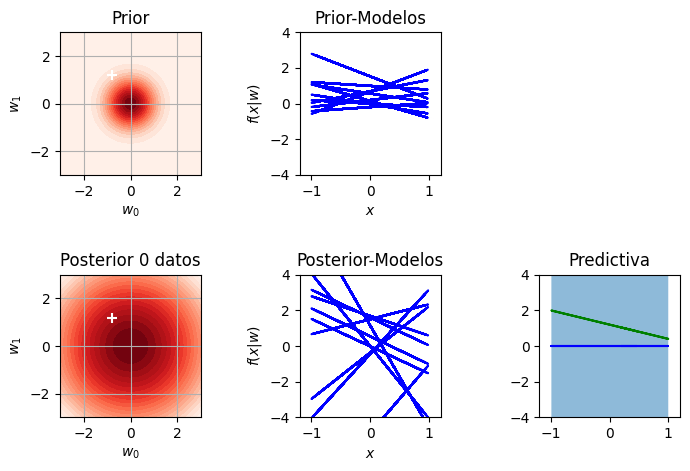

In [338]:
from matplotlib import animation, rc
from IPython.display import HTML

# Aleatory Sampling Vector over X
ind = np.random.randint(0,X.shape[0],size=X.shape[0])

# Prior Weights
mu_w = np.array([0,0])
sig_w = 0.5
S_w = sig_w*np.eye(len(mu_w))

# Graph Limits
wxlim = [-3,3]
wylim = [-3,3]
xlim = [-1.2,1.2]
ylim = [-4,4]

# Animation and Fig Setup
fig, ax = plt.subplots(2, 3,figsize=(8,5))
ax[0,2].axis('off')

def update(i):
  """
  Function for Animated and Interactive Graph
  """
  # Bayesian Regressor Actualization
  # Prior Graphing
  ax[0,0].clear()
  ax[0,1].clear()
  ax[1,0].clear()
  ax[1,1].clear()
  ax[1,2].clear()

  PDF2D(mu_w,S_w,axes=ax[0,0],cmap='Reds',xlim=wxlim,ylim=wylim)

  # Regressor Sampling From Prior
  LinRegSyn(mu_w,S_w,axes=ax[0,1],xlim=xlim,ylim=ylim)

  # Update Prior to Posterior
  mN,SN = posteriorUpdate(X[ind[:i]],t[ind[:i]],sig_eta,sig_w,tol=1e-10)
  PDF2D(mN,SN,axes=ax[1,0],cmap='Reds',xlim=wxlim,ylim=wylim)
  LinRegSyn(mN,SN,axes=ax[1,1],xlim=xlim,ylim=ylim)
  ax[1,1].scatter(X[ind[:i],0],t[ind[:i]],c='r',marker='.')

  # Original Weights
  ax[1,0].scatter(w_[0],w_[1],marker='+',s=60,c='w')
  ax[0,0].scatter(w_[0],w_[1],marker='+',s=60,c='w')

  # Predictive Graphing
  mnew,snew = predictiveUpdate(X,mN,SN,sig_eta)
  ax[1,2].plot(X[:,0],tt,c='g')
  ax[1,2].scatter(X[ind[:i],0],t[ind[:i]],c='r',marker='.')
  ax[1,2].plot(X[:,0],mnew,c='b')
  ii = np.argsort(X[:,0]) #organizar eje x para visualizar incertidumbre
  ax[1,2].fill_between(X[ii,0].ravel(), mnew[ii].ravel() - 1.96*snew[ii],
                        mnew[ii].ravel() + 1.96*snew[ii], alpha=0.5)

  # Predictive Visualization Limits
  ax[1,2].set_xlim(xlim)
  ax[1,2].set_ylim(ylim)

  # Titles
  ax[0,0].set_title('Prior')
  ax[0,1].set_title('Prior-Modelos')
  ax[1,0].set_title('Posterior ' + str(i) + ' datos' )
  ax[1,1].set_title('Posterior-Modelos')
  ax[1,2].set_title('Predictiva')
  plt.subplots_adjust(wspace=0.7,hspace=0.7)
  print(i)

# Desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, 50, 2), blit=False)
rc('animation', html='jshtml')


0
0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48


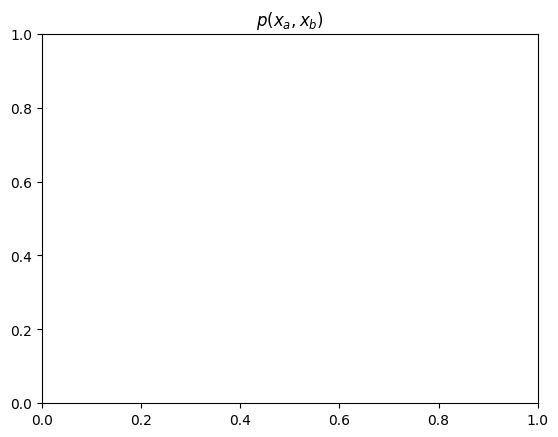

In [339]:
anim

#**Tarea 3**

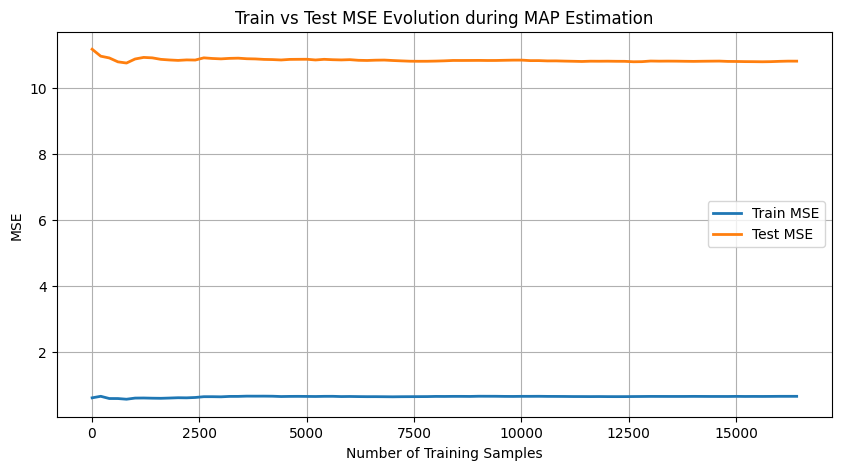

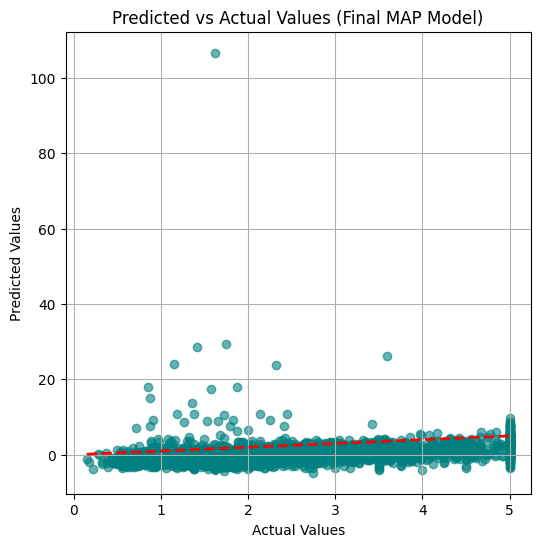

Most significant coefficients indices: [0 2]


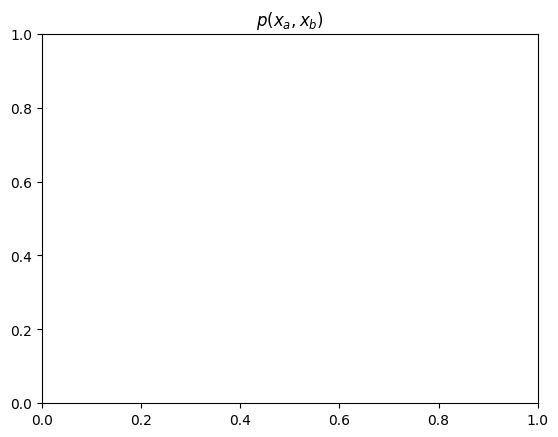

In [340]:
# ===============================================
# UPGRADED MAP ESTIMATION FOR CALIFORNIA HOUSING
# ===============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal as mn
import matplotlib.animation as animation
from IPython.display import HTML

# ===============================================
# DATA PREPARATION
# ===============================================
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term
X_train = np.c_[X_train, np.ones(X_train.shape[0])]
X_test  = np.c_[X_test, np.ones(X_test.shape[0])]

# Two most informative features for posterior visualization
X_vis = X_train[:, :2]
X_vis = np.c_[X_vis, np.ones(X_vis.shape[0])]
y_vis = y_train

# ===============================================
# MAP ESTIMATION OVER TIME
# ===============================================
sig_eta = 1  # Observation noise variance
sig_w = 10    # Prior variance

mN_hist, SN_hist = [], []
MSE_train_hist, MSE_test_hist = [], []
RMSE_train_hist, RMSE_test_hist = [], []

N_samples = np.arange(10, len(X_vis), 200)

for N in N_samples:
  Xn, tn = X_vis[:N], y_vis[:N]
  mN, SN = posteriorUpdate(Xn, tn, sig_eta, sig_w)
  mN_hist.append(mN)
  SN_hist.append(SN)

  # Predictions for training & testing
  y_train_pred, _ = predictiveUpdate(Xn, mN, SN, sig_eta)
  y_test_pred, _  = predictiveUpdate(X_test[:, :3], mN, SN, sig_eta)

  mse_train = mean_squared_error(tn, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  MSE_train_hist.append(mse_train)
  MSE_test_hist.append(mse_test)

  RMSE_train_hist.append(np.sqrt(mse_train))
  RMSE_test_hist.append(np.sqrt(mse_test))

# ===============================================
# TRAIN/TEST LOSS EVOLUTION
# ===============================================
plt.figure(figsize=(10,5))
plt.plot(N_samples, MSE_train_hist, label='Train MSE', lw=2)
plt.plot(N_samples, MSE_test_hist, label='Test MSE', lw=2)
plt.xlabel("Number of Training Samples")
plt.ylabel("MSE")
plt.title("Train vs Test MSE Evolution during MAP Estimation")
plt.legend()
plt.grid(True)
plt.show()

# ===============================================
# PREDICTED vs ACTUAL VALUES (FINAL MODEL)
# ===============================================
y_final_pred, _ = predictiveUpdate(X_test[:, :3], mN_hist[-1], SN_hist[-1], sig_eta)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_final_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (Final MAP Model)")
plt.grid(True)
plt.show()

# ===============================================
# IDENTIFY TWO MOST SIGNIFICANT WEIGHTS
# ===============================================
# Use the last posterior mean and covariance to determine the most relevant parameters
final_mN = mN_hist[-1]
final_SN = SN_hist[-1]

# Find indices of two coefficients with largest absolute posterior mean (|mN|)
significant_idx = np.argsort(np.abs(final_mN))[-2:]

print("Most significant coefficients indices:", significant_idx)

# ===============================================
# UPDATED POSTERIOR ANIMATION
# ===============================================
fig, ax = plt.subplots(figsize=(6,6))
xlim, ylim = [-2, 2], [-2, 2]

def update(frame):
  ax.clear()
  # Select subspace of the two most significant coefficients
  idx = significant_idx
  mu_sub = mN_hist[frame][idx]
  Sigma_sub = SN_hist[frame][np.ix_(idx, idx)]

  PDF2D(mu_sub, Sigma_sub, ax, xlim=xlim, ylim=ylim)
  ax.set_title(f"Posterior over Significant Weights after {N_samples[frame]} samples")
  return ax

ani = animation.FuncAnimation(fig, update, frames=len(N_samples), interval=400)
plt.close(fig)
HTML(ani.to_jshtml())

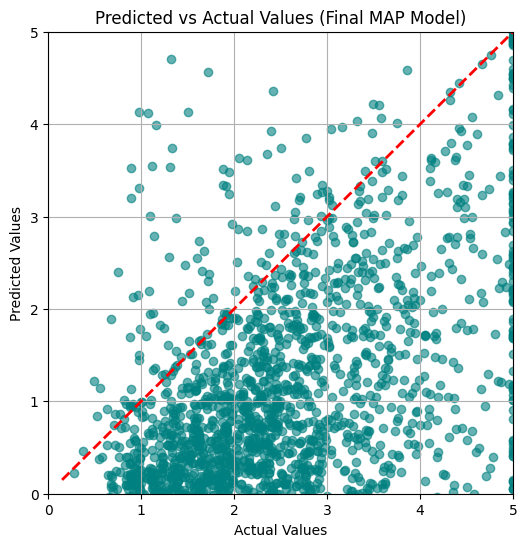

In [342]:
y_final_pred, _ = predictiveUpdate(X_test[:, :3], mN_hist[-1], SN_hist[-1], sig_eta)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_final_pred, alpha=0.6, color='teal',)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Predicted vs Actual Values (Final MAP Model)")
plt.grid(True)
plt.show()